In [99]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [19]:
df=pd.read_csv("body_fat.csv")


In [33]:
df["Weight in kg"].unique()

array([ 69.95464853,  78.57142857,  69.84126984,  83.78684807,
        83.5600907 ,  95.35147392,  82.0861678 ,  79.8185941 ,
        86.62131519,  89.90929705,  84.46712018,  97.95918367,
        81.85941043,  93.08390023,  85.14739229,  73.80952381,
        88.7755102 ,  94.89795918,  83.33333333,  96.03174603,
        81.17913832,  90.92970522,  63.60544218,  67.46031746,
        68.59410431,  72.22222222,  59.63718821,  67.12018141,
        60.430839  ,  72.90249433,  82.53968254,  72.67573696,
        76.19047619,  99.09297052, 112.13151927,  86.96145125,
        91.72335601,  89.22902494, 164.69387755,  92.06349206,
       119.16099773,  92.97052154,  98.41269841,  96.14512472,
        56.80272109,  74.48979592,  60.54421769,  67.34693878,
        61.56462585,  57.82312925,  71.76870748,  63.15192744,
        62.24489796,  69.27437642,  61.79138322,  89.79591837,
        82.31292517,  91.26984127,  91.83673469,  81.51927438,
        81.06575964,  87.64172336,  80.72562358,  93.19

In [3]:
df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [22]:
df["Height in m"]=df["Height"]/39.37

In [23]:
df["Weight in kg"]=df["Weight"]/2.205

In [24]:
df["BMI"]=df["Weight in kg"]/(df["Height in m"]**2)

In [120]:
df1=df.copy(deep=True)

In [95]:
df1=df1.drop(["Weight","Height","Height in m","Weight in kg"],axis=1)


In [67]:
df1.corr()["BodyFat"]

Density   -0.987782
BodyFat    1.000000
Age        0.291458
Neck       0.490592
Chest      0.702620
Abdomen    0.813432
Hip        0.625201
Thigh      0.559608
Knee       0.508665
Ankle      0.265970
Biceps     0.493271
Forearm    0.361387
Wrist      0.346575
BMI        0.371395
Name: BodyFat, dtype: float64

In [68]:
df1.isnull().sum()

Density    0
BodyFat    0
Age        0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
BMI        0
dtype: int64

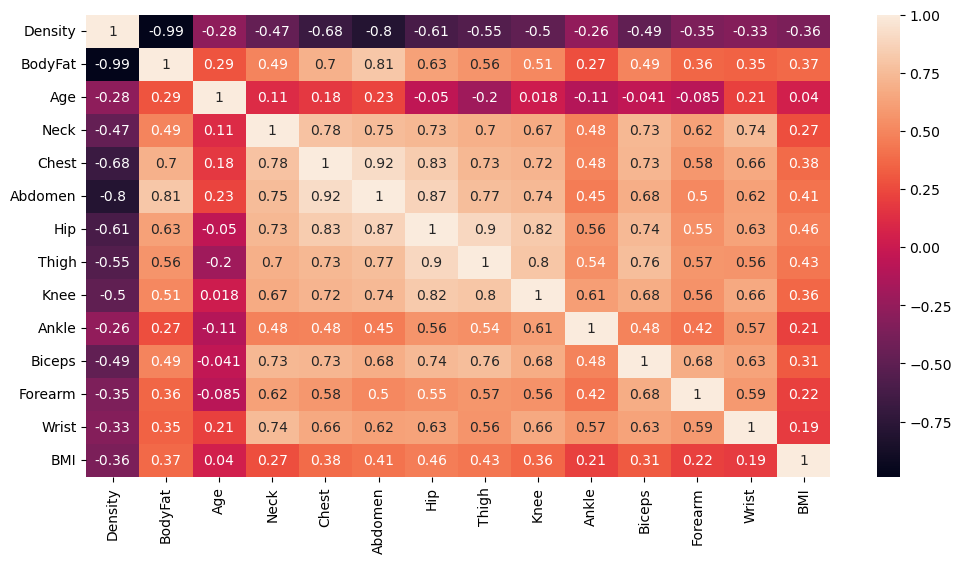

In [69]:
plt.figure(figsize=(12,6))
sns.heatmap(df1.corr(),annot=True)
plt.show()

D:\Users\Anuj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BodyFat', ylabel='Density'>

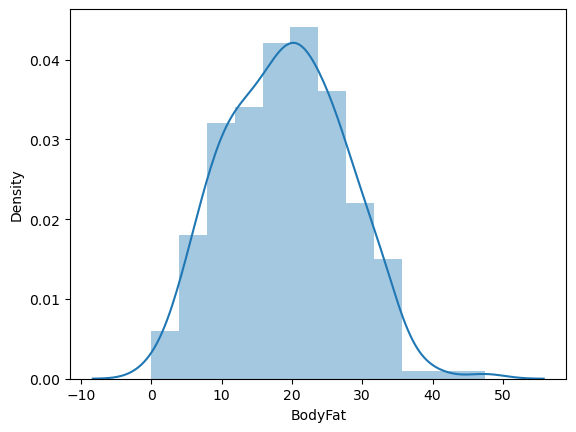

In [70]:
#Lets check the distribution of the target column
sns.distplot(df1["BodyFat"])
# Distribution is near to normally distributed

In [72]:
#Lets Check skewness also
df1.skew()

Density    -0.020176
BodyFat     0.146353
Age         0.283521
Neck        0.552620
Chest       0.681556
Abdomen     0.838418
Hip         1.497127
Thigh       0.821210
Knee        0.516744
Ankle       2.255134
Biceps      0.285530
Forearm    -0.219333
Wrist       0.281614
BMI        12.592566
dtype: float64

In [ ]:
# lets apply feature Selection techniques 
# VIF actually finds if there is any multicollinearity or not

In [73]:
df_vif=df1.drop("BodyFat",axis=1)


In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Variable"] = df_vif.columns
vif["VIF"] = [variance_inflation_factor(df_vif, i) for i in range(df_vif.shape[1])]

# Print the VIF values
print(vif)

   Variable          VIF
0   Density   573.165533
1       Age    27.636990
2      Neck   977.881109
3     Chest  1147.395586
4   Abdomen   988.570296
5       Hip  2177.875708
6     Thigh   979.609219
7      Knee  1054.546456
8     Ankle   345.167874
9    Biceps   406.830031
10  Forearm   440.443559
11    Wrist  1273.013156
12      BMI    11.343064


In [75]:
df_vif=df_vif.drop("Hip",axis=1)

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Variable"] = df_vif.columns
vif["VIF"] = [variance_inflation_factor(df_vif, i) for i in range(df_vif.shape[1])]

# Print the VIF values
print(vif)

   Variable          VIF
0   Density   483.794579
1       Age    25.893455
2      Neck   977.198932
3     Chest  1146.393892
4   Abdomen   773.711687
5     Thigh   815.653464
6      Knee  1005.766272
7     Ankle   344.040405
8    Biceps   406.329811
9   Forearm   435.884629
10    Wrist  1259.167245
11      BMI    10.985991


In [77]:
df_vif=df_vif.drop(["Chest","Wrist"],axis=1)

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Variable"] = df_vif.columns
vif["VIF"] = [variance_inflation_factor(df_vif, i) for i in range(df_vif.shape[1])]

# Print the VIF values
print(vif)

  Variable         VIF
0  Density  406.365274
1      Age   23.777902
2     Neck  831.394345
3  Abdomen  397.519059
4    Thigh  798.001357
5     Knee  972.499711
6    Ankle  313.978625
7   Biceps  390.369626
8  Forearm  413.945774
9      BMI   10.857703


In [79]:
df_vif=df_vif.drop(["Knee","Neck"],axis=1)

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Variable"] = df_vif.columns
vif["VIF"] = [variance_inflation_factor(df_vif, i) for i in range(df_vif.shape[1])]

# Print the VIF values
print(vif)

  Variable         VIF
0  Density  287.938928
1      Age   22.696620
2  Abdomen  332.787386
3    Thigh  659.497233
4    Ankle  278.122051
5   Biceps  368.637947
6  Forearm  385.102038
7      BMI   10.705516


In [81]:
df_vif=df_vif.drop(["Thigh"],axis=1)

In [82]:

vif = pd.DataFrame()
vif["Variable"] = df_vif.columns
vif["VIF"] = [variance_inflation_factor(df_vif, i) for i in range(df_vif.shape[1])]

# Print the VIF values
print(vif)

  Variable         VIF
0  Density  252.091498
1      Age   16.201909
2  Abdomen  199.842616
3    Ankle  270.406127
4   Biceps  319.896911
5  Forearm  385.057051
6      BMI   10.207173


In [84]:
df_vif=df_vif.drop(["Forearm"],axis=1)

In [85]:

vif = pd.DataFrame()
vif["Variable"] = df_vif.columns
vif["VIF"] = [variance_inflation_factor(df_vif, i) for i in range(df_vif.shape[1])]

# Print the VIF values
print(vif)

  Variable         VIF
0  Density  192.969019
1      Age   16.102071
2  Abdomen  195.422208
3    Ankle  267.246166
4   Biceps  249.042700
5      BMI   10.204080


In [87]:
df_vif=df_vif[["Density","Age","BMI","Abdomen"]]

In [89]:

vif = pd.DataFrame()
vif["Variable"] = df_vif.columns
vif["VIF"] = [variance_inflation_factor(df_vif, i) for i in range(df_vif.shape[1])]

# Print the VIF values
print(vif)

  Variable        VIF
0  Density  61.382582
1      Age  14.491944
2      BMI  10.193092
3  Abdomen  80.735169


In [90]:
df_vif=df_vif.drop("Density",axis=1)

In [91]:
vif = pd.DataFrame()
vif["Variable"] = df_vif.columns
vif["VIF"] = [variance_inflation_factor(df_vif, i) for i in range(df_vif.shape[1])]

# Print the VIF values
print(vif)

  Variable        VIF
0      Age  14.102633
1      BMI  10.091878
2  Abdomen  24.955184


In [92]:
df_vif=df_vif.drop("Abdomen",axis=1)

In [93]:
vif = pd.DataFrame()
vif["Variable"] = df_vif.columns
vif["VIF"] = [variance_inflation_factor(df_vif, i) for i in range(df_vif.shape[1])]

# Print the VIF values
print(vif)

  Variable       VIF
0      Age  5.665394
1      BMI  5.665394


In [96]:
X=df1[["Age","BMI"]]
Y=df1["BodyFat"]

In [100]:
lr=LinearRegression()

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=24)
lr.fit(X_train,Y_train)
y_pred=lr.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 score",r2_score(Y_test,y_pred))

Mean Squared Error: 53.379157789947605
R2 score 0.3338800112860416


In [ ]:
# vif is not working good We will use coorelation analysis for Feature Selection

In [103]:
X=df[["Age","Chest","Neck","BMI","Abdomen"]]
Y=df["BodyFat"]

In [117]:
# Lets Try Linear Regression
lr1=LinearRegression()

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=24)
lr1.fit(X_train,Y_train)
y_pred=lr1.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 score",r2_score(Y_test,y_pred))

Mean Squared Error: 14.790826129244065
R2 score 0.8154248710132778


In [112]:
# Lets Try Decision Tree
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=24)

model_dt = DecisionTreeRegressor(
    max_depth=3,  # maximum depth of the decision tree
    random_state=10
)

model_dt.fit(X_train, Y_train)

y_pred = model_dt.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
r2_score_dt = r2_score(Y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2_score_dt)


Mean Squared Error: 20.819945359385866
R2 Score: 0.7401873251280281


In [113]:
# Lets try Random Forest regressor
from sklearn.ensemble import RandomForestRegressor
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=24)
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
y_pred_rf=rf.predict(X_test)
mse = mean_squared_error(Y_test, y_pred_rf)
print("Mean Squared Error:", mse)
print("R2 Score",r2_score(Y_test, y_pred_rf))

Mean Squared Error: 18.395756843137267
R2 Score 0.7704388407746111


In [114]:
# Lets apply Xg Boost Regressor
import xgboost as xgb
X=df[["Age","Chest","Neck","BMI","Abdomen"]]
Y=df["BodyFat"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=24)
model_xb = xgb.XGBRegressor(
    n_estimators=30,  # number of boosting rounds (trees)
    max_depth=3,  # maximum depth of each tree
    learning_rate=0.1,  # learning rate (shrinkage) to prevent overfitting
    random_state=10
)
model_xb.fit(X_train, Y_train)
y_pred_xb = model_xb.predict(X_test)
r2_score_xb=r2_score(Y_test, y_pred_xb)
print("R2 Score",r2_score_xb)
mse = mean_squared_error(Y_test, y_pred_xb)
print("Mean Squared Error:", mse)


R2 Score 0.7846060172263474
Mean Squared Error: 17.260477974362775


In [115]:
import lightgbm as lgb

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=24)

model_lgb = lgb.LGBMRegressor(
    n_estimators=30,  # number of boosting rounds (trees)
    max_depth=3,  # maximum depth of each tree
    learning_rate=0.1,  # learning rate (shrinkage) to prevent overfitting
    random_state=42
)

model_lgb.fit(X_train, Y_train)


y_pred = model_lgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2_score_lgb = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2_score_lgb)


Mean Squared Error: 17.157334350689286
R2 Score: 0.7858931493633449


In [116]:
from catboost import CatBoostRegressor
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=24)

model_cat = CatBoostRegressor(
    iterations=100,  # number of boosting iterations (trees)
    depth=3,  # maximum depth of each tree
    learning_rate=0.1,  # learning rate (shrinkage) to prevent overfitting
    random_state=42
)

model_cat.fit(X_train, Y_train)

y_pred_cat = model_cat.predict(X_test)

mse = mean_squared_error(Y_test, y_pred_cat)
r2_score_cat = r2_score(Y_test, y_pred_cat)

print("Mean Squared Error:", mse)
print("R2 Score:", r2_score_cat)


0:	learn: 7.9108410	total: 293ms	remaining: 29s
1:	learn: 7.5420415	total: 294ms	remaining: 14.4s
2:	learn: 7.2190438	total: 295ms	remaining: 9.53s
3:	learn: 6.9260932	total: 296ms	remaining: 7.09s
4:	learn: 6.6848405	total: 296ms	remaining: 5.63s
5:	learn: 6.4912312	total: 297ms	remaining: 4.65s
6:	learn: 6.2685171	total: 298ms	remaining: 3.96s
7:	learn: 6.1106884	total: 298ms	remaining: 3.43s
8:	learn: 5.9498047	total: 299ms	remaining: 3.02s
9:	learn: 5.7868944	total: 300ms	remaining: 2.7s
10:	learn: 5.6821580	total: 300ms	remaining: 2.43s
11:	learn: 5.5809452	total: 301ms	remaining: 2.21s
12:	learn: 5.4847212	total: 302ms	remaining: 2.02s
13:	learn: 5.3981800	total: 302ms	remaining: 1.86s
14:	learn: 5.3039119	total: 303ms	remaining: 1.72s
15:	learn: 5.2510810	total: 304ms	remaining: 1.59s
16:	learn: 5.1696096	total: 305ms	remaining: 1.49s
17:	learn: 5.1199434	total: 305ms	remaining: 1.39s
18:	learn: 5.0732506	total: 306ms	remaining: 1.3s
19:	learn: 5.0273624	total: 307ms	remaining: 

In [118]:
# save the model
import pickle
file = open("body_fat_model.pkl", "wb")
pickle.dump(lr1, file)
file.close()

In [121]:
# saving a dataframe
with open('df.pkl', 'wb') as file:
    pickle.dump(df1, file)